# Mini-Project 1. Data Cleaning and Preparation

You work as a data scientist for a telecom company that is experiencing an increase in customer churn (loss of customer to competition). You have just been given a representative subset of customer data. In preparation for your modeling work you are expected to conduct data preparation:



1. Show the steps you would take to clean the data for modeling

2. Describe the data, provide an overview of data, including data exploration analysis. 

3. Identify missing values and implement your preferred treatment for the missing values. Provide justification for the choices you make

4. Conduct data transformation on the data where required (Rescaling, Standardization, and/or Normalization) and provide justification for any methods you use

5. Include charts in your report

## 1. Steps to clean data for modeling

* Data exploration
* Identificaton and treatment of missing values
* Convertion of categoric variables to numeric
* Data Rescaling
* Data Standardization
* Data Normalization
* Handling imbalance in the class feature

In [1]:
# importing all packages required

import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
import collections

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data overview, description, and exploratory analysis

In [2]:
# loading the data
file = 'Churn_Train.csv'
path = 'C:/Datasets/'
df = pd.read_csv(path + file)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
3,HI,NaN,area_code_408,no,yes,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,no
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes


### Dimensions of the data

In [3]:
samples = df.shape[0]
features = df.shape[1]
print(
    'The dataset has %d samples and %d features including the target feature' %
    (samples, features))

The dataset has 3333 samples and 20 features including the target feature


### Data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 2832 non-null   float64
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3133 non-null   float64
 6   total_day_minutes              3133 non-null   float64
 7   total_day_calls                3133 non-null   float64
 8   total_day_charge               3133 non-null   float64
 9   total_eve_minutes              3032 non-null   float64
 10  total_eve_calls                3133 non-null   float64
 11  total_eve_charge               3133 non-null   float64
 12  total_night_minutes            3133 non-null   f

In [5]:
# summary statistics for numerical data
print(df.describe())

       account_length  number_vmail_messages  total_day_minutes  \
count     2832.000000            3133.000000        3133.000000   
mean        97.321328               7.332589         418.947048   
std         47.874422              13.756056         626.315020   
min       -209.000000             -10.000000           0.000000   
25%         72.000000               0.000000         149.300000   
50%        100.000000               0.000000         190.500000   
75%        127.000000              16.000000         237.800000   
max        243.000000              51.000000        2185.100000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3133.000000       3133.000000        3032.000000      3133.000000   
mean        100.331631         30.628455         324.258872       100.128631   
std          20.039364          9.275752         320.129372        19.899854   
min           0.000000          0.000000           0.000000         0.000000

Filling up the missing values with the median is recommended for most of the features, over using the mean because certain features have a large standard deviation which is a measure of how spread out the data points are from the mean, the wider the standard deviaton the more unreliable the mean is to represent the missing values.

## 3. Identifying missing values

A good number of variables in our data are numeric data types (15), and the categorical variables (5) do not contain any missing values

In [6]:
df.isna().sum()

state                              0
account_length                   501
area_code                          0
international_plan                 0
voice_mail_plan                    0
number_vmail_messages            200
total_day_minutes                200
total_day_calls                  200
total_day_charge                 200
total_eve_minutes                301
total_eve_calls                  200
total_eve_charge                 200
total_night_minutes              200
total_night_calls                  0
total_night_charge               200
total_intl_minutes               200
total_intl_calls                 301
total_intl_charge                200
number_customer_service_calls    200
churn                              0
dtype: int64

In [7]:
# to determine the percentage of missing columns
cols = df.columns
for col in cols:
    missing = df[col].isna().sum()
    perc = missing / df.shape[0] * 100
    if perc == 0.0:
        continue
    print('%s: %.1f%% Missing' % (col, perc))

account_length: 15.0% Missing
number_vmail_messages: 6.0% Missing
total_day_minutes: 6.0% Missing
total_day_calls: 6.0% Missing
total_day_charge: 6.0% Missing
total_eve_minutes: 9.0% Missing
total_eve_calls: 6.0% Missing
total_eve_charge: 6.0% Missing
total_night_minutes: 6.0% Missing
total_night_charge: 6.0% Missing
total_intl_minutes: 6.0% Missing
total_intl_calls: 9.0% Missing
total_intl_charge: 6.0% Missing
number_customer_service_calls: 6.0% Missing


The median is a prefered choice for filling the missing values because the standard deviations of most of the values are very large, so we can't relly on the mean.

In [8]:
clean_df = df.fillna(df.median())

In [9]:
clean_df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## 4. Data Transformation

### Converting categorical columns
In order for our algorithims to understand and properly process the features, it is required that we convert categorical variables to numeric variables.

In [10]:
# ENCODE CATEGORICAL FEATURES
# NORMALIZE THE DATA
# STANDARDIZE THE DATA
# SCALE THE DATA

In [11]:
# using one-hot encoding
encode = LabelEncoder()
clean_df['state'] = encode.fit_transform(clean_df['state'])
clean_df['area_code'] = encode.fit_transform(clean_df['area_code'])
clean_df['international_plan'] = encode.fit_transform(
    clean_df['international_plan'])
clean_df['voice_mail_plan'] = encode.fit_transform(clean_df['voice_mail_plan'])
clean_df['churn'] = encode.fit_transform(clean_df['churn'])

In [12]:
clean_df.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,97.723972,1.000600,0.096910,0.276628,6.892589,405.238854,100.371737,30.629748,313.931233,100.120912,17.084299,201.210951,100.107711,9.054386,10.231233,4.427843,2.762847,1.527753,0.144914
std,14.824911,44.139070,0.709649,0.295879,0.447398,13.450072,609.646965,19.429285,8.993062,307.082453,19.293402,4.164562,48.893742,19.568609,2.200258,2.719852,2.345713,0.734327,1.282522,0.352067
min,0.000000,-209.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,77.000000,0.000000,0.000000,0.000000,0.000000,151.800000,88.000000,24.890000,175.900000,88.000000,14.270000,169.400000,87.000000,7.620000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,26.000000,100.000000,1.000000,0.000000,0.000000,0.000000,190.500000,101.000000,30.650000,209.900000,100.000000,17.090000,201.400000,100.000000,9.060000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,122.000000,2.000000,0.000000,1.000000,0.000000,234.200000,113.000000,36.430000,251.000000,113.000000,19.750000,232.600000,113.000000,10.470000,11.900000,5.000000,3.210000,2.000000,0.000000
max,50.000000,243.000000,2.000000,1.000000,1.000000,51.000000,2185.100000,165.000000,59.640000,1244.200000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


### Scaling the Data
This is important because of the varying scales/ranges in the differeint features of our data, our model will weigh some featuers over others, to avoid this we rescale the data. using a range between 0 and 1 for all features.

In [13]:
# get the values of our dataframe into a numpy array
array = clean_df.values

# separating the values into independent and dependent components
X = array[:, :19]
y = array[:, -1]

# instatiating the scaler, and passing our independent variables to it
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_x = scaler.fit_transform(X)

# peak at the data
rescaled_x[:5, :]

array([[0.66      , 0.73893805, 1.        , 0.        , 0.        ,
        0.16393443, 0.92142236, 0.6       , 0.48054997, 0.89021058,
        0.62941176, 0.48301521, 0.59198494, 0.41549296, 0.59234907,
        0.545     , 0.35      , 0.54444444, 0.        ],
       [0.22      , 0.70132743, 0.5       , 0.        , 0.        ,
        0.16393443, 0.13344927, 0.6       , 0.83115359, 0.17770455,
        0.54705882, 0.60789389, 0.55406132, 0.54225352, 0.55409444,
        0.7       , 0.45      , 0.7       , 0.22222222],
       [0.14      , 0.64380531, 0.5       , 0.        , 0.        ,
        0.16393443, 0.13743078, 0.66060606, 0.85596915, 0.145475  ,
        0.58823529, 0.49789712, 0.6640667 , 0.28169014, 0.66407651,
        0.585     , 0.2       , 0.58518519, 0.        ],
       [0.22      , 0.68362832, 0.        , 0.        , 1.        ,
        0.6557377 , 0.05047824, 0.43030303, 0.31438632, 0.14660023,
        0.63529412, 0.50145584, 0.43195266, 0.38732394, 0.4321578 ,
        0.55 

In [14]:
# converting the numpy array to a dataframe
rescaled_df = pd.DataFrame(rescaled_x, columns=cols[:-1])
rescaled_df.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.521188,0.678593,0.500300,0.096910,0.276628,0.276928,0.185456,0.608314,0.513577,0.252316,0.588947,0.552711,0.478781,0.472590,0.479043,0.511562,0.221392,0.511638,0.169750
std,0.296498,0.097653,0.354824,0.295879,0.447398,0.220493,0.279002,0.117753,0.150789,0.246811,0.113491,0.134732,0.131505,0.137807,0.131516,0.135993,0.117286,0.135986,0.142502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280000,0.632743,0.000000,0.000000,0.000000,0.163934,0.069471,0.533333,0.417337,0.141376,0.517647,0.461663,0.393222,0.380282,0.393305,0.430000,0.150000,0.429630,0.111111
50%,0.520000,0.683628,0.500000,0.000000,0.000000,0.163934,0.087181,0.612121,0.513917,0.168703,0.588235,0.552896,0.479290,0.471831,0.479378,0.515000,0.200000,0.514815,0.111111
75%,0.780000,0.732301,1.000000,0.000000,1.000000,0.163934,0.107180,0.684848,0.610832,0.201736,0.664706,0.638952,0.563206,0.563380,0.563658,0.595000,0.250000,0.594444,0.222222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the summary statistic of our data below, we can see that the minimun and maximum values have all been rescaled to 0 and 1 respectively

### Standardizing the data
The standard deviaton varries from feature to feature, using the StandardScaler form sci-kit learn, we could make our features have a standard deviation centerd around 1 and a mean centered around 0, hence Standardize them.

In [15]:
# standardizing the data
standard = StandardScaler()
standard_x = standard.fit_transform(rescaled_df)

In [16]:
# converting the numpy array to a dataframe
rescaled_df = pd.DataFrame(standard_x, columns=cols[:-1])
rescaled_df.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,-1.594218e-16,-2.199128e-16,7.168317e-17,1.690484e-16,3.863963e-18,-3.035875e-16,-1.644849e-16,-2.711019e-16,-1.748776e-18,1.118217e-16,4.739850e-16,2.028913e-16,-4.376937e-17,-2.153659e-16,-7.468107e-17,3.471404e-16,-1.642184e-17,1.521102e-16,-3.650778e-17
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-1.758076e+00,-6.950078e+00,-1.410205e+00,-3.275805e-01,-6.183963e-01,-1.256136e+00,-6.648104e-01,-5.166778e+00,-3.406442e+00,-1.022456e+00,-5.190165e+00,-4.102920e+00,-3.641318e+00,-3.429870e+00,-3.643023e+00,-3.762252e+00,-1.887915e+00,-3.762988e+00,-1.191388e+00
25%,-8.135776e-01,-4.695858e-01,-1.410205e+00,-3.275805e-01,-6.183963e-01,-5.125343e-01,-4.157765e-01,-6.368527e-01,-6.383376e-01,-4.495599e-01,-6.283356e-01,-6.758746e-01,-6.507116e-01,-6.699340e-01,-6.520153e-01,-5.998408e-01,-6.087944e-01,-6.031564e-01,-4.115578e-01
50%,-4.007771e-03,5.157266e-02,-8.457004e-04,-3.275805e-01,-6.183963e-01,-5.125343e-01,-3.522876e-01,3.234072e-02,2.252299e-03,-3.388238e-01,-6.267958e-03,1.369034e-03,3.867106e-03,-5.505089e-03,2.551703e-03,2.528711e-02,-1.824209e-01,2.336193e-02,-4.115578e-01
75%,8.730262e-01,5.500721e-01,1.408514e+00,-3.275805e-01,1.617086e+00,-5.125343e-01,-2.805960e-01,6.500578e-01,6.450664e-01,-2.049634e-01,6.676386e-01,6.401875e-01,6.420813e-01,6.589239e-01,6.434819e-01,6.136428e-01,2.439527e-01,6.090203e-01,3.682729e-01
max,1.615132e+00,3.291819e+00,1.408514e+00,3.052685e+00,1.617086e+00,3.279836e+00,2.919933e+00,3.326832e+00,3.226332e+00,3.029832e+00,3.622460e+00,3.320343e+00,3.964068e+00,3.827739e+00,3.961773e+00,3.592193e+00,6.639556e+00,3.591792e+00,5.827088e+00


### Normalizing the data
using the normalizer from sci-kit learn, our dataset will get closser to a normal or gaussian distribution, which is the normal assumption of data.

In [17]:
normal = Normalizer()
normal_x = normal.fit_transform(rescaled_df)
normal_x[:5, :]

array([[ 1.00231293e-01,  1.32299048e-01,  3.01505175e-01,
        -7.01215701e-02, -1.32373324e-01, -1.09712619e-01,
         5.64741793e-01, -1.51151640e-02, -4.68923345e-02,
         5.53328536e-01,  7.63344913e-02, -1.10747904e-01,
         1.84295451e-01, -8.87027457e-02,  1.84448457e-01,
         5.26415087e-02,  2.34758541e-01,  5.16484574e-02,
        -2.55027504e-01],
       [-2.58926856e-01,  5.93421711e-02, -2.15532469e-04,
        -8.34861055e-02, -1.57602479e-01, -1.30622849e-01,
        -4.75127074e-02, -1.79959772e-02,  5.36833385e-01,
        -7.70549368e-02, -9.40780163e-02,  1.04398634e-01,
         1.45913748e-01,  1.28854085e-01,  1.45460068e-01,
         3.53195708e-01,  4.96829777e-01,  3.53067933e-01,
         9.38568390e-02],
       [-3.19540514e-01, -8.85416789e-02, -2.10164818e-04,
        -8.14069556e-02, -1.53677524e-01, -1.27369799e-01,
        -4.27825397e-02,  1.10376140e-01,  5.64367728e-01,
        -1.07592177e-01, -1.55764889e-03, -1.01118239e-01,
    

In [18]:
# converting the numpy array to a dataframe
normal_df = pd.DataFrame(normal_x, columns=cols[:-1])
normal_df.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.000975,0.005288,0.001115,-0.019522,-0.019803,-0.023254,-0.028696,0.000350,-0.000424,-0.028256,0.002233,0.000204,0.001403,0.000803,0.001385,0.002505,-0.009899,0.002484,-0.010080
std,0.259499,0.218279,0.257143,0.209493,0.248759,0.231735,0.194025,0.232699,0.234046,0.194336,0.235441,0.235228,0.222895,0.249242,0.222901,0.219196,0.222466,0.219195,0.233144
min,-0.836067,-0.909241,-0.784380,-0.291013,-0.549365,-0.548501,-0.312962,-0.746009,-0.763763,-0.301001,-0.781026,-0.771693,-0.600249,-0.889542,-0.600626,-0.617542,-0.619580,-0.616994,-0.513824
25%,-0.206454,-0.110946,-0.197184,-0.094807,-0.174384,-0.152523,-0.113995,-0.153012,-0.156080,-0.122434,-0.152628,-0.157632,-0.155394,-0.167491,-0.155139,-0.142221,-0.154458,-0.142167,-0.160299
50%,-0.000911,0.014461,-0.000209,-0.078109,-0.136078,-0.118533,-0.088618,0.011757,0.001019,-0.087064,-0.002436,0.000624,0.001750,-0.001141,0.001163,0.010661,-0.047733,0.009849,-0.085018
75%,0.206295,0.129161,0.192597,-0.063377,0.270650,-0.070935,-0.063279,0.152721,0.149029,-0.048122,0.155088,0.150223,0.160464,0.166106,0.160290,0.152507,0.099384,0.152702,0.106596
max,0.822969,0.757105,0.763140,0.931444,0.863564,0.715041,0.643851,0.770792,0.732728,0.633068,0.787269,0.787857,0.636926,0.907153,0.637018,0.611230,0.886441,0.610861,0.846740


In [19]:
# adding the target feature, to the dataframe
target = 'churn'
normal_df[target] = clean_df[target]
normal_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.100231,0.132299,0.301505,-0.070122,-0.132373,-0.109713,0.564742,-0.015115,-0.046892,0.553329,0.076334,-0.110748,0.184295,-0.088703,0.184448,0.052642,0.234759,0.051648,-0.255028,0
1,-0.258927,0.059342,-0.000216,-0.083486,-0.157602,-0.130623,-0.047513,-0.017996,0.536833,-0.077055,-0.094078,0.104399,0.145914,0.128854,0.145460,0.353196,0.496830,0.353068,0.093857,1
2,-0.319541,-0.088542,-0.000210,-0.081407,-0.153678,-0.127370,-0.042783,0.110376,0.564368,-0.107592,-0.001558,-0.101118,0.350191,-0.344304,0.349689,0.134220,-0.045333,0.134424,-0.296072,1
3,-0.248532,0.012616,-0.344971,-0.080134,0.395580,0.420332,-0.118364,-0.369861,-0.323196,-0.104795,0.099916,-0.093075,-0.087123,-0.151380,-0.087221,0.069154,0.372582,0.069019,0.090089,0
4,0.119332,-0.066006,-0.000167,-0.064809,-0.122344,-0.101401,-0.022018,0.199898,0.588137,-0.055757,0.162854,0.106700,-0.191466,0.140474,-0.191048,0.405132,0.216973,0.406117,-0.235706,1


### Checking for imbalance 

In [20]:
normal_df[target].value_counts()

0    2850
1     483
Name: churn, dtype: int64

There is an imbalance in the number of churn values: no(0)  =  2850 yes(1) =  483.
This is quite significant, because we want out model to get a good representation of both states of churn.

To achieve a balance we will use SMOTE from sklearn which creates synthetic observations of the minority class (churn=yes or 1) by:

Finding the k-nearest-neighbors for minority class observations by randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

In [21]:
# get the values of our dataframe into a numpy array
array = normal_df.values

# separating the values into independent and dependent components
X = array[:, :19]
y = array[:, -1]

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X, y)

In [22]:
print(X[:, 0])

[ 0.10023129 -0.25892686 -0.31954051 ...  0.48427542  0.10491293
  0.36053898]


In [23]:
# data labels before SMOTE:
collections.Counter(y)

Counter({0.0: 2850, 1.0: 483})

In [24]:
# after SMOTE:
collections.Counter(y_train_res)

Counter({0.0: 2850, 1.0: 2850})

In [25]:
# putting our data back into a dataframe
churn_df = pd.DataFrame(X_train_res, columns=cols[:-1])

In [26]:
churn_df[target] = y_train_res
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5700 non-null   float64
 1   account_length                 5700 non-null   float64
 2   area_code                      5700 non-null   float64
 3   international_plan             5700 non-null   float64
 4   voice_mail_plan                5700 non-null   float64
 5   number_vmail_messages          5700 non-null   float64
 6   total_day_minutes              5700 non-null   float64
 7   total_day_calls                5700 non-null   float64
 8   total_day_charge               5700 non-null   float64
 9   total_eve_minutes              5700 non-null   float64
 10  total_eve_calls                5700 non-null   float64
 11  total_eve_charge               5700 non-null   float64
 12  total_night_minutes            5700 non-null   f

## 5. Visualizing the data through plots

## Univariate plots
We will place the compare the former(norm_df) and the transfomred data

### Histogram
From the histogram below: the data is distrubuted accross more bins. The effect of normalizing our data is clearly seen as compared to the former state our data was in before the data was transformed. from the charts below, the observed skewness in features like account length and total eve charge has reduced.

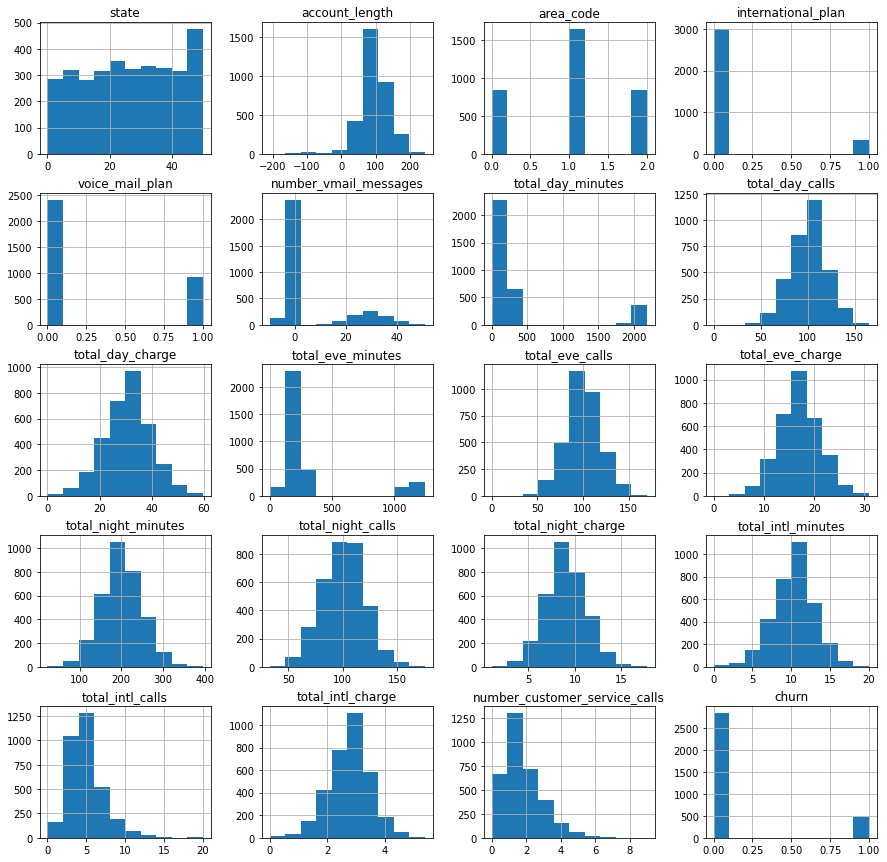

In [27]:
# the distribution before it was transformed
clean_df.hist(figsize=(15, 15))
plt.show()

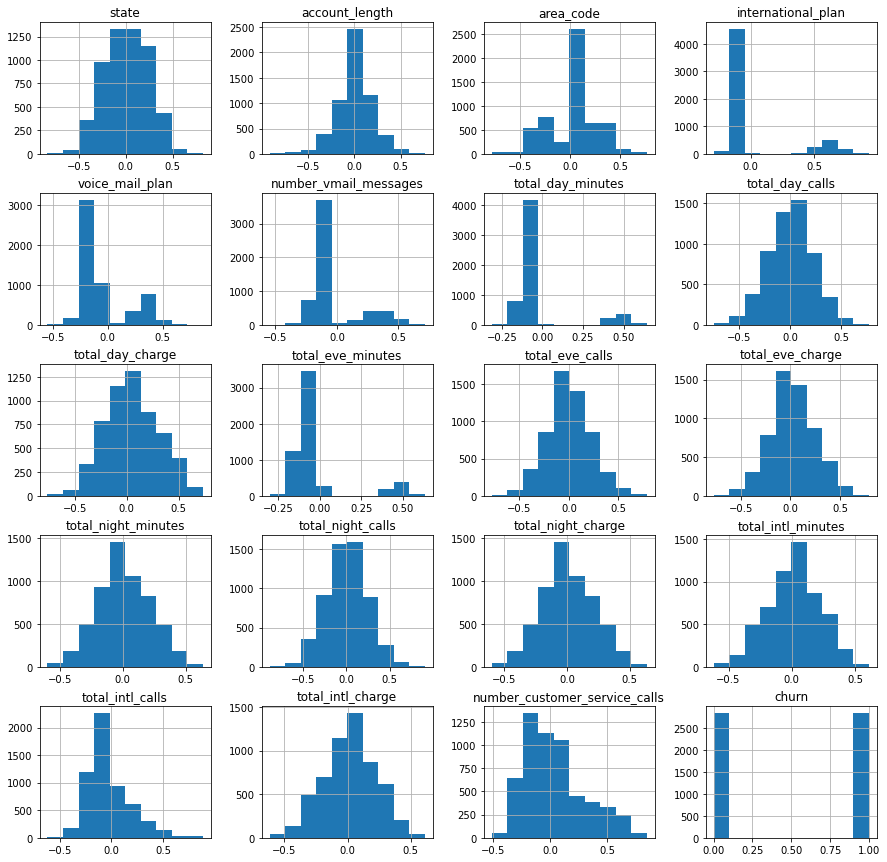

In [28]:
churn_df.hist(figsize=(15, 15))
plt.show()

### Density plots
Density plots show the the distribution of the attributes in a continuous smoothened way as aginst the histogram which dispalys the distrubution as well but in bins.

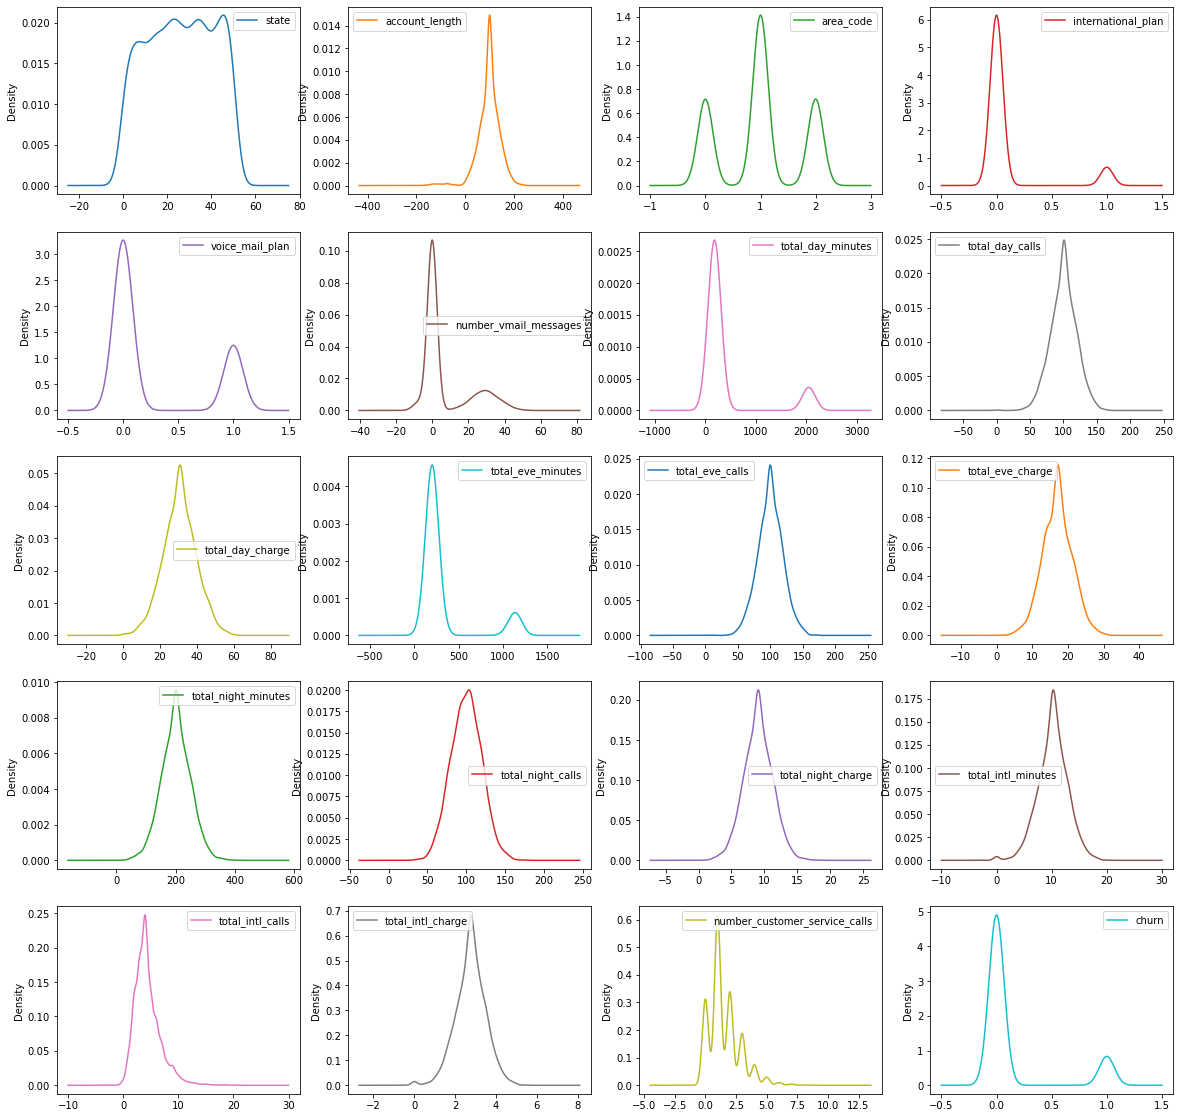

In [29]:
# before transformation
kind = 'density'
clean_df.plot(kind=kind, subplots=True, layout=(5, 4), sharex=False)
plt.gcf().set_size_inches(20, 20)
plt.show()

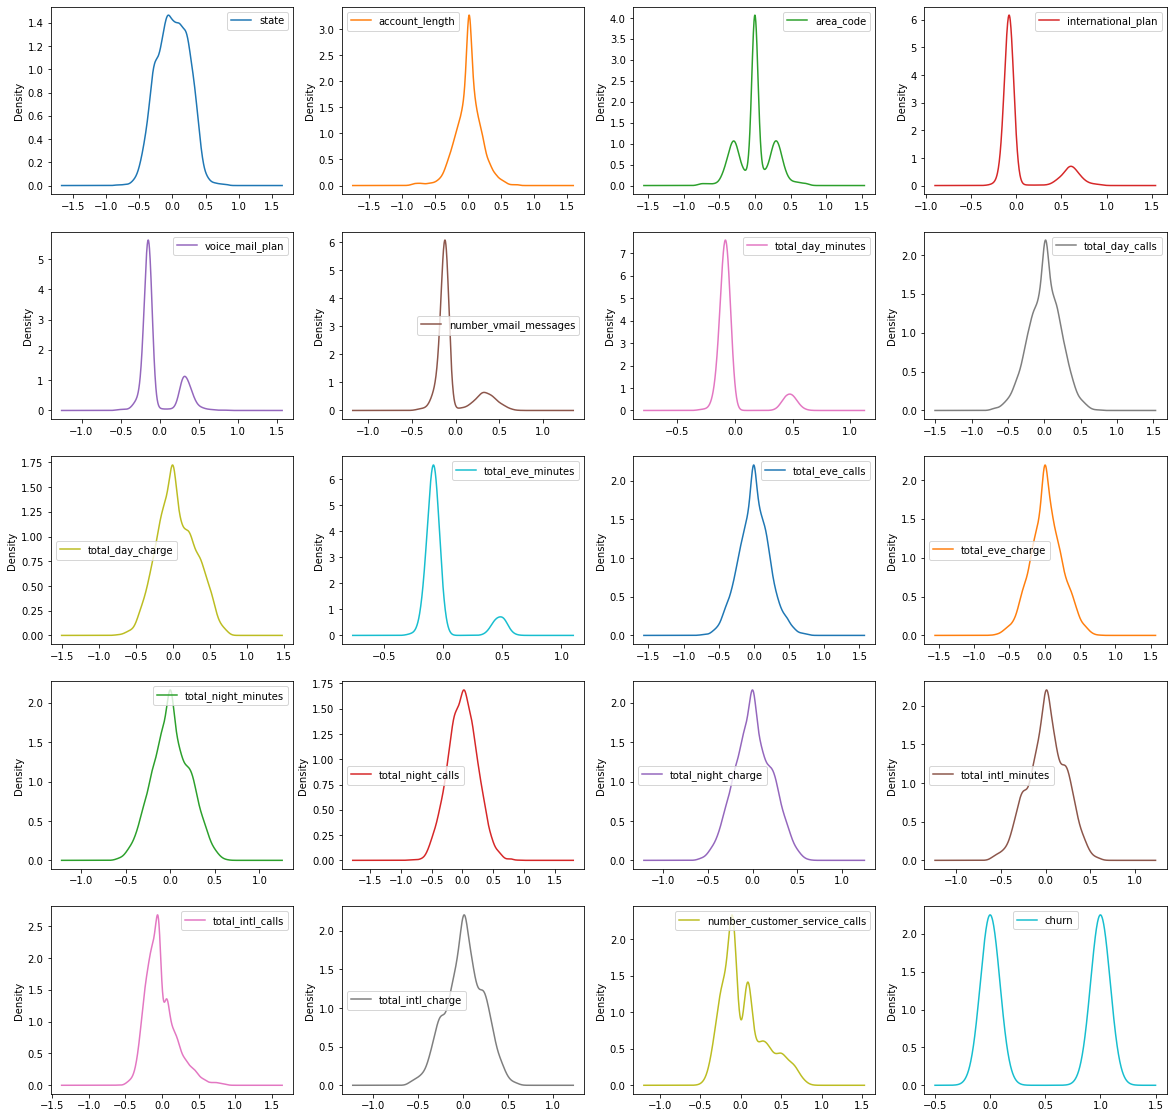

In [30]:
# After transformation
kind = 'density'
churn_df.plot(kind=kind, subplots=True, layout=(5, 4), sharex=False)
plt.gcf().set_size_inches(20, 20)
plt.show()

### Box and whisker plots
These give us a summary of how each attribute is distributed, the line in the box represents the median (50th percentile), while the box consists of the 25th and 75th percentiles, the whiskers show how speared out the data is. and the circles outside the box show the outliers.

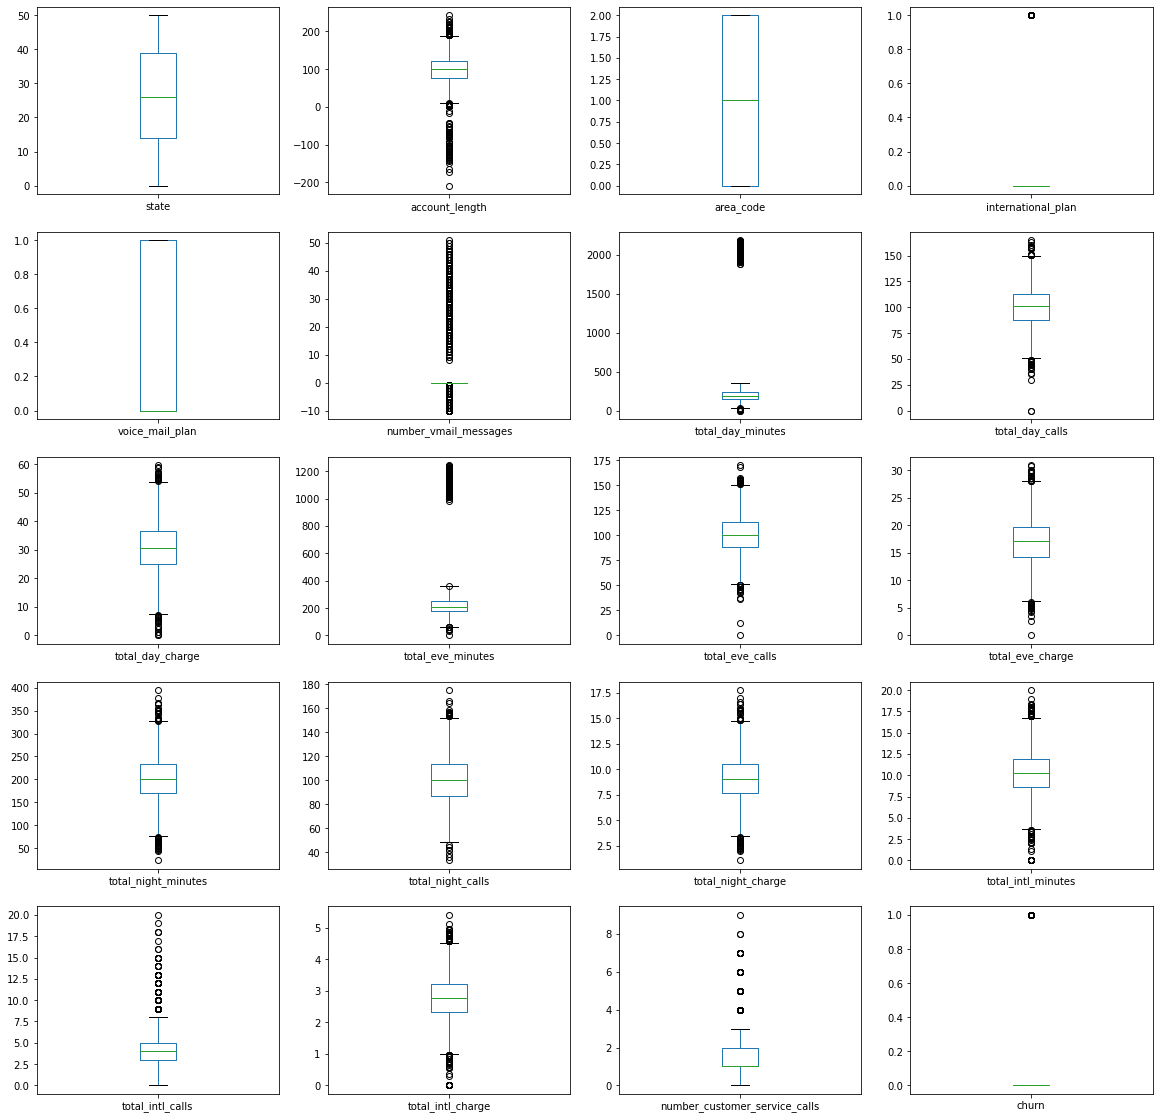

In [31]:
kind = 'box'
clean_df.plot(kind=kind,
              subplots=True,
              layout=(5, 4),
              sharex=False,
              sharey=False)
plt.gcf().set_size_inches(20, 20)
plt.show()

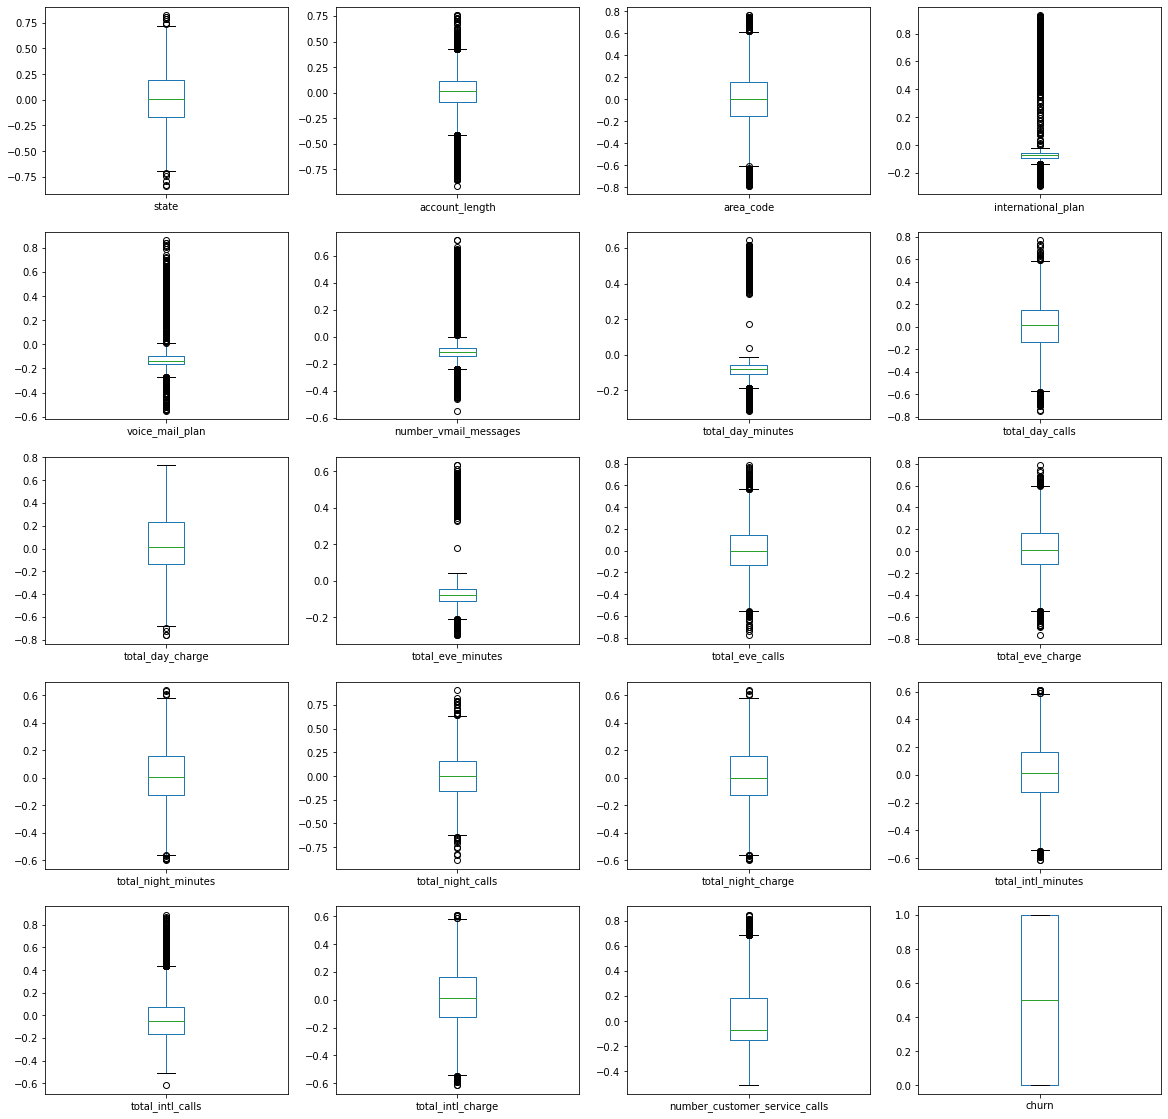

In [32]:
kind = 'box'
churn_df.plot(kind=kind,
              subplots=True,
              layout=(5, 4),
              sharex=False,
              sharey=False)
plt.gcf().set_size_inches(20, 20)
plt.show()

## Multivariate Plots

### Correlation matrix with a heatmap
This plot will show us which features in our data have a relationship and to what extent.

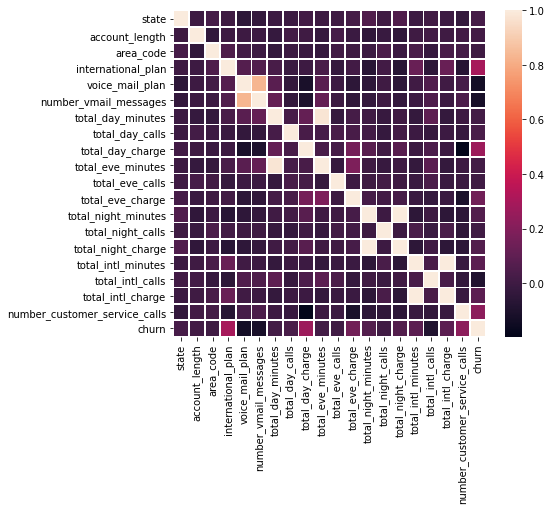

In [33]:
corr = churn_df.corr()

# plot the heatmap
fig = plt.figure(figsize=(7, 6))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            linewidths=.75)
plt.show()

we can see strong correlation between the features:

* features like total night/day/eve/intl calls correlates strongly with total night/day/eve/intl charge
* voice mail plan and number of voice mail messages also correlate
* churn has a correlation with number of customer service calls, total day charge, and international plan

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = churn_df

array = df.values
X = array[:, :19]
y = array[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
res = model.score(X_test, y_test)
print(res, res.std())

0.7824561403508772 0.0


In [35]:
#make alias
dframe = normal_df
arr = dframe.values
X = arr[:, :19]
y = arr[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.5)

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
res = model.score(X_test, y_test)
print(res, res.std())

0.850629874025195 0.0
